In [1]:
import pandas as pd
import numpy as np

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

from urllib.request import urlopen
from urllib.parse import urlencode
from matplotlib.animation import FuncAnimation

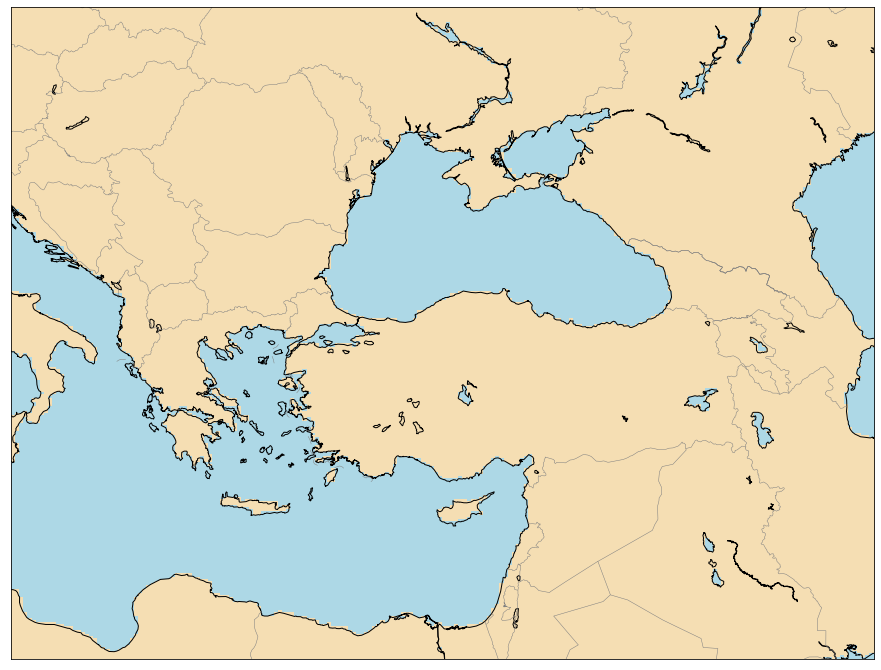

In [2]:
m = Basemap(projection='merc',
           llcrnrlat=30,
           urcrnrlat=50,
           llcrnrlon=15,
           urcrnrlon=50,
           resolution='i')

fig = plt.figure(figsize=(20,12))

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawlsmask(land_color='wheat', ocean_color='lightblue')
plt.show()

In [3]:
baseurl = 'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?'

params = {'starttime': '1995-01-01',
          'endtime': '2022-03-01',
          'minlatitude': 39,
          'maxlatitude': 43,
          'minlongitude': 23,
          'maxlongitude': 33,
          'minmagnitude': 3.0,
          'eventtype': 'earthquake',
          'producttype': 'origin'}

url = baseurl + urlencode(params) 

with urlopen(url) as conn:
    quakes = pd.read_csv(conn)

In [4]:
quakes = quakes.sort_index(ascending=False)
quakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
3475,1995-01-05T20:57:43.360Z,39.7870,25.6470,14.30,3.9,mb,NaN,NaN,NaN,1.00,...,2014-11-07T00:57:05.944Z,"36 km W of Bozcaada, Turkey",earthquake,NaN,2.1,NaN,10.0,reviewed,us,us
3474,1995-01-08T13:08:54.980Z,39.3290,25.5500,27.00,4.2,mb,NaN,NaN,NaN,0.90,...,2014-11-07T00:57:06.860Z,"37 km WNW of Eresós, Greece",earthquake,NaN,2.3,NaN,18.0,reviewed,us,us
3473,1995-01-08T22:29:57.340Z,39.7960,30.5080,10.00,3.7,md,NaN,NaN,NaN,0.90,...,2014-11-07T00:57:06.907Z,"2 km NNW of Eski?ehir, Turkey",earthquake,NaN,NaN,NaN,NaN,reviewed,us,isk
3472,1995-01-08T22:50:56.540Z,39.7730,30.8140,5.00,3.1,md,NaN,NaN,NaN,0.60,...,2014-11-07T00:57:06.918Z,"10 km E of Sevinç, Turkey",earthquake,NaN,NaN,NaN,NaN,reviewed,us,isk
3471,1995-01-08T22:53:16.840Z,39.7860,30.3880,5.00,3.2,md,NaN,NaN,NaN,1.30,...,2014-11-07T00:57:06.920Z,"11 km W of Eski?ehir, Turkey",earthquake,NaN,NaN,NaN,NaN,reviewed,us,isk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-01-16T18:29:27.928Z,40.0425,24.3400,10.00,4.2,mb,NaN,48.0,1.421,0.89,...,2022-02-13T14:46:36.040Z,"25 km SSE of Karyes, Greece",earthquake,3.0,2.0,0.136,15.0,reviewed,us,us
3,2022-01-16T22:32:01.622Z,40.1249,24.4732,10.00,4.4,mb,NaN,52.0,1.300,0.78,...,2022-02-14T23:58:44.040Z,"24 km SE of Karyes, Greece",earthquake,5.3,1.7,0.149,13.0,reviewed,us,us
2,2022-01-22T19:31:42.837Z,39.5763,28.8232,2.68,4.6,mwr,NaN,26.0,0.744,0.69,...,2022-02-13T01:14:51.788Z,"17 km E of Dursunbey, Turkey",earthquake,2.7,4.2,0.060,27.0,reviewed,us,us
1,2022-02-06T12:07:52.856Z,40.5313,28.9725,11.00,4.2,mb,NaN,56.0,1.223,0.55,...,2022-02-26T13:21:57.040Z,"11 km SSW of Kocadere, Turkey",earthquake,2.2,6.4,0.186,8.0,reviewed,us,us


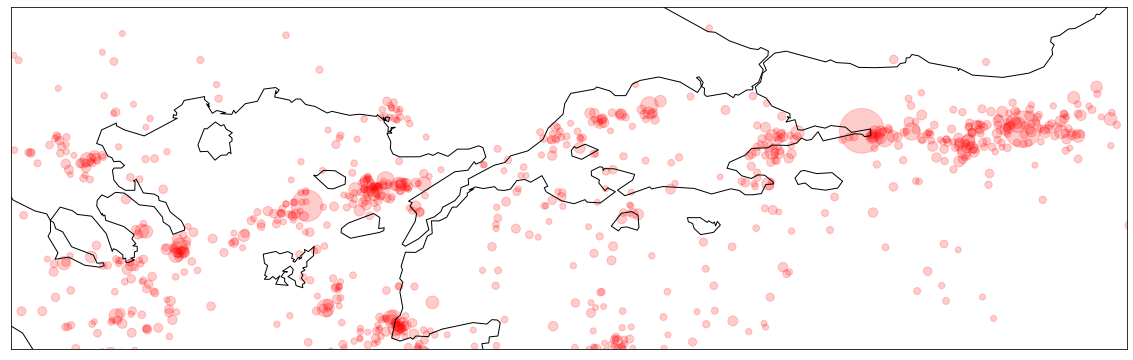

In [5]:
fig = plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat = params['minlatitude']+0.4,
           urcrnrlat = params['maxlatitude']-1.5,
           llcrnrlon = params['minlongitude'],
           urcrnrlon = params['maxlongitude']-1.0,
           resolution='i')

m.drawcoastlines()
#m.drawlsmask(land_color='wheat', ocean_color='lightblue')

subset = quakes[quakes['mag']>3.5]
xs,ys = m(subset['longitude'], subset['latitude'])
sizes = np.exp(subset['mag'])

m.scatter(xs, ys, s=sizes, c='red', alpha=0.2)

plt.show()

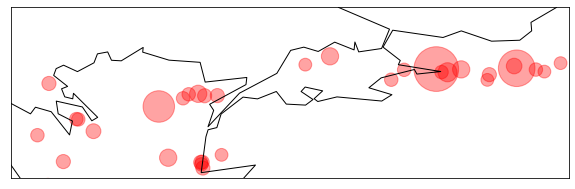

In [6]:
fig = plt.figure(figsize=(10,6))

m = Basemap(projection='merc',
           llcrnrlat = params['minlatitude']+0.4,
           urcrnrlat = params['maxlatitude']-1.5,
           llcrnrlon = params['minlongitude'],
           urcrnrlon = params['maxlongitude']-1.0,
           resolution='l')

m.drawcoastlines()
#m.drawlsmask(land_color='wheat', ocean_color='lightblue')
subset = quakes[quakes['mag']>5.0]
xs,ys = m(subset['longitude'], subset['latitude'])
sizes = np.exp(subset['mag'])

N = len(xs)

def animate(i):
    xx = xs[i:i+2]
    yy = ys[i:i+2]
    ss = sizes[i:i+2]
    m.scatter(xx, yy, s=ss, color='red', alpha=0.2)

anim = FuncAnimation(fig, animate, N-2, interval=2, repeat = False)

anim.save('../images/anim.gif')
plt.show()